In [1]:
# load libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, Input


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

2025-09-11 14:53:34.627372: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-09-11 14:53:34.627580: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-09-11 14:53:34.748772: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
# adding data
df_train = pd.read_csv("../input/digit-recognizer/train.csv")
df_test = pd.read_csv("../input/digit-recognizer/test.csv")

In [3]:
# brief look at dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [4]:
df_train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [5]:
# check for missing values
df_test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [6]:
# set up y_train, X_train
y_train = df_train["label"].values
X_train = df_train.drop(labels=["label"],axis=1).values

# set up X_test
X_test = df_test.values

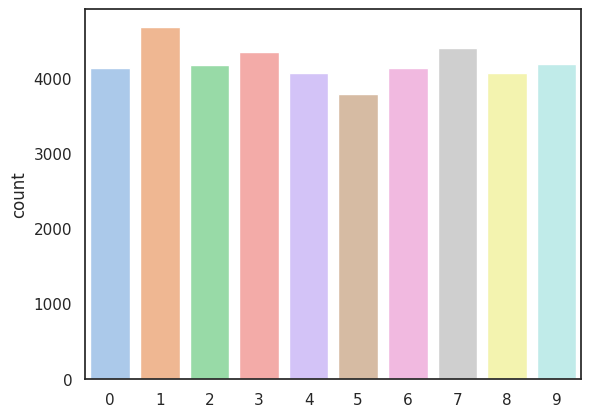

In [7]:
# distribution of labels in countplot
sns.set(style='white', context='notebook', palette='pastel')

sns.countplot(x=y_train)

plt.show()

In [8]:
# reshape and normalize data
X_train = X_train.reshape((-1,28,28,1))/ 255.0
X_test = X_test.reshape((-1,28,28,1))/ 255.0
 
print(X_train.shape, X_test.shape)

(42000, 28, 28, 1) (28000, 28, 28, 1)


In [9]:
# one-hot encoding for Y_train using keras.utils.to_categorical
y_train = to_categorical(y_train, num_classes=10)

In [10]:
# train_test_split for train and validation set for fitting the model
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state=38)

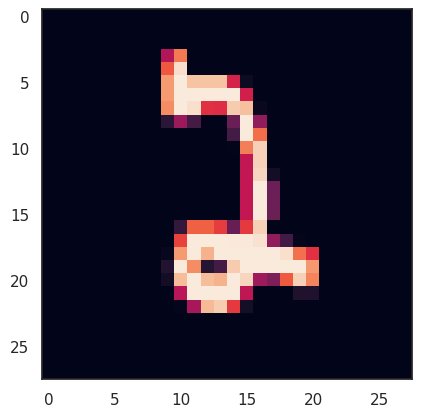

In [11]:
g = plt.imshow(X_train[0][:,:,0])

In [12]:
# build the CNN model
model = Sequential([
    Input(shape=(28,28,1)),
    Conv2D(32, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),
    
    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(
    loss= 'categorical_crossentropy',
    optimizer= 'adam',
    metrics= ['accuracy']
)

In [13]:
# train the model with train and validation sets
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=128, verbose=2)

Epoch 1/10
263/263 - 17s - 65ms/step - accuracy: 0.6831 - loss: 0.9338 - val_accuracy: 0.9363 - val_loss: 0.2191
Epoch 2/10
263/263 - 14s - 54ms/step - accuracy: 0.9057 - loss: 0.3145 - val_accuracy: 0.9585 - val_loss: 0.1400
Epoch 3/10
263/263 - 14s - 54ms/step - accuracy: 0.9326 - loss: 0.2248 - val_accuracy: 0.9688 - val_loss: 0.1068
Epoch 4/10
263/263 - 14s - 55ms/step - accuracy: 0.9463 - loss: 0.1846 - val_accuracy: 0.9719 - val_loss: 0.0930
Epoch 5/10
263/263 - 14s - 54ms/step - accuracy: 0.9526 - loss: 0.1614 - val_accuracy: 0.9762 - val_loss: 0.0797
Epoch 6/10
263/263 - 20s - 77ms/step - accuracy: 0.9562 - loss: 0.1448 - val_accuracy: 0.9769 - val_loss: 0.0752
Epoch 7/10
263/263 - 21s - 78ms/step - accuracy: 0.9624 - loss: 0.1288 - val_accuracy: 0.9771 - val_loss: 0.0710
Epoch 8/10
263/263 - 14s - 53ms/step - accuracy: 0.9647 - loss: 0.1219 - val_accuracy: 0.9799 - val_loss: 0.0667
Epoch 9/10
263/263 - 14s - 54ms/step - accuracy: 0.9663 - loss: 0.1161 - val_accuracy: 0.9823 - 

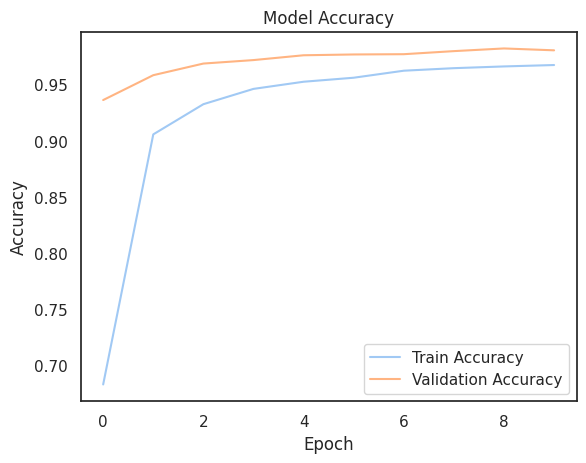

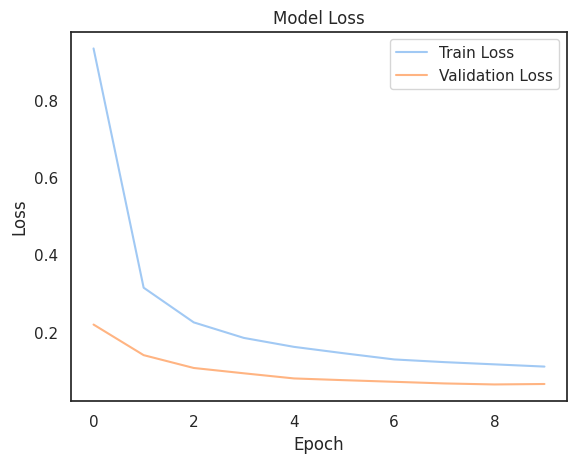

In [14]:
# plotting accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# plotting loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [15]:
# predict labels of y_test
y_test = model.predict(X_test)
y_labels = np.argmax(y_test, axis=1)

875/875 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step


In [16]:
sub = pd.DataFrame({
    'ImageId': np.arange(1, len(y_labels)+1),
    'Label': y_labels 
})

sub.to_csv('submission.csv', index=False)